Feature 1: This is a data set I created for a fictional Fruit and Veggie sales company. They want to know their top most profitable customers and their most profitable regions. Their data is spread out between three files. In the below code block the three files are read into Python, the excel file is reformated to .csv and they are merged into one master file. This file is called 'comp_data.csv' and is saved in the 'final_files' folder.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cu_data = pd.read_csv('final_files/cust_data.csv')
or_data = pd.read_csv('final_files/order_data.csv')
prd_data = pd.read_excel('final_files/prod_data.xlsx')

cust_order_data = pd.merge(cu_data, or_data, on='customer_id', how='outer')
comp_data = pd.merge(prd_data, cust_order_data, on='product_id', how='outer')
comp_data.to_csv('final_files/comp_data.csv', sep=',', index=False)


#Use the below code if you want to review the combine file. 

#comp_data_set = pd.read_csv('final_files/comp_data.csv')
#print(comp_data_set.to_string())



Feature 2: Prior to analyzng the data it needs to be cleaned. In the below code block unwanted columns are removed, cells with NaN values are updated, and data types are corrected so figures can be correctly calulated in the later analysis.

In [ ]:
col_drop = pd.read_csv('final_files/comp_data.csv')
col_drop1 = pd.DataFrame(col_drop)
col_drop2 = col_drop1.drop(['product_type', 'years_served'], axis=1, inplace=False)
col_org = col_drop2.sort_values(['order_date', 'order_id'], inplace=False)

col_nan = col_org.fillna({'product_id':'blank','product_name':'blank', 
                          'unit_price':'0.00', 'unit_cost':'0.00', 'order_id':'blank', 'quantity':'0.0', 
                          'order_date':'0/00/0000', 'order_status':'blank'}, inplace=False)

col_type = col_nan.astype({'unit_price':'float', 'unit_cost':'float', 'customer_id':'object', 'quantity':'float'})
print(col_type.to_string())

Feature 3: The customer wants to know the top 15 customers by the profit and which region is most profitable. The coding below creates a new column called 'Profits' based off of the Unit Price, Unit Cost, and Quantity sold. The sales are then grouped by each customer and the print show spreadsheet format top 15 customers. The second block of coding show the regions listed in order of the most profitable to least profitable.

In [ ]:
#Code to show the top 15 most profitable customers.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['customer_id'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[False]).head(15)
top_cust = pd.merge(col_group, cu_data, on='customer_id', how='left')

#Code to Show the regions by most profitable.
col_type['profit'] = ((col_type['unit_price'] - col_type['unit_cost']) * col_type['quantity'])
col_group = col_type.groupby(['region'], sort=True)['profit'].sum().reset_index()
col_group = col_group.sort_values(by = ['profit'], ascending=[False]).head(9)

print(top_cust.to_string())
print(col_group.to_string())


Feature 4:



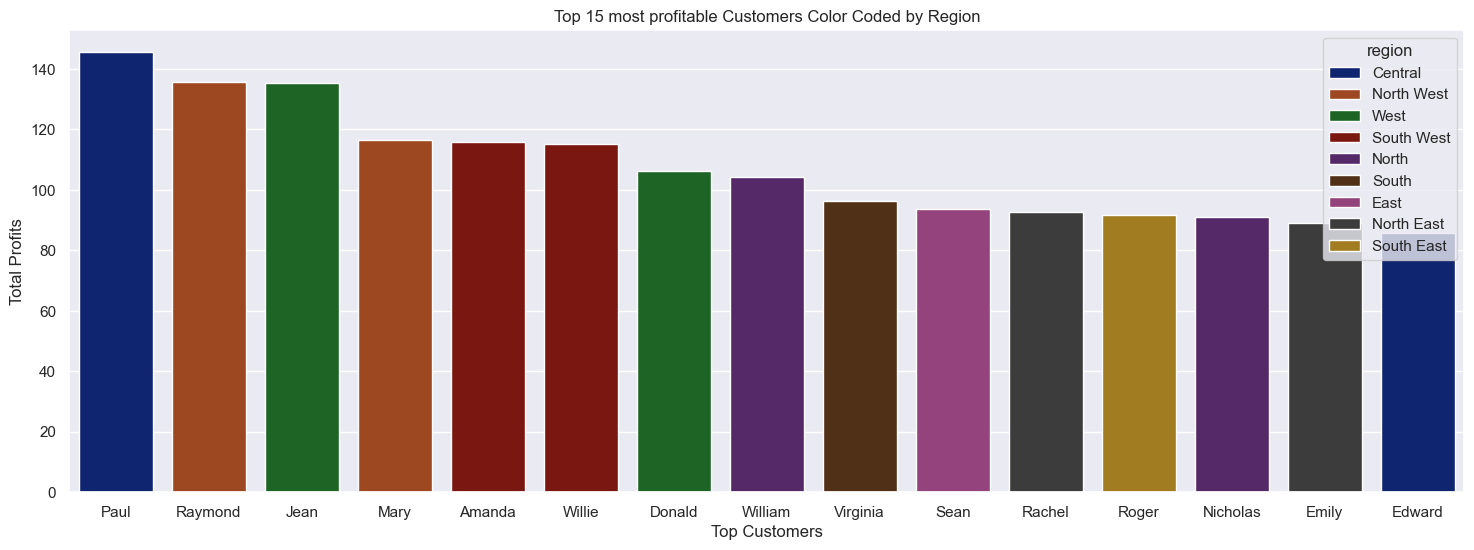

In [79]:
#Code to graph the Top 15 Customers.
sns.set(rc={'figure.figsize':(18,6)})

top_custs = sns.barplot(
    data=top_cust,
    x='customer_name_first', y='profit', hue='region',
    palette='dark', dodge=False
)

top_custs.set(xlabel='Top Customers', ylabel='Total Profits', 
    title='Top 15 most profitable Customers Color Coded by Region')

top_custs.figure.savefig('final_files/top_15_custs.png')

Feature 4:

The below code block builds and displays a line graph of the Sales Regions listed by profitablity. The graph has two lines:

    1) The green line with upward facing arrows shows all the regions that have profits greater than or equal to $500.
    2) The red line with downward facing arrows shows all the regions that have profits less than $500.
    3) The code saves a copy of this graph to the 'fianl_files' folder.

Based on this graph the reccomendation is to increas promotions and marketing in the East, North, Cental, and South East regions to increase profits. 

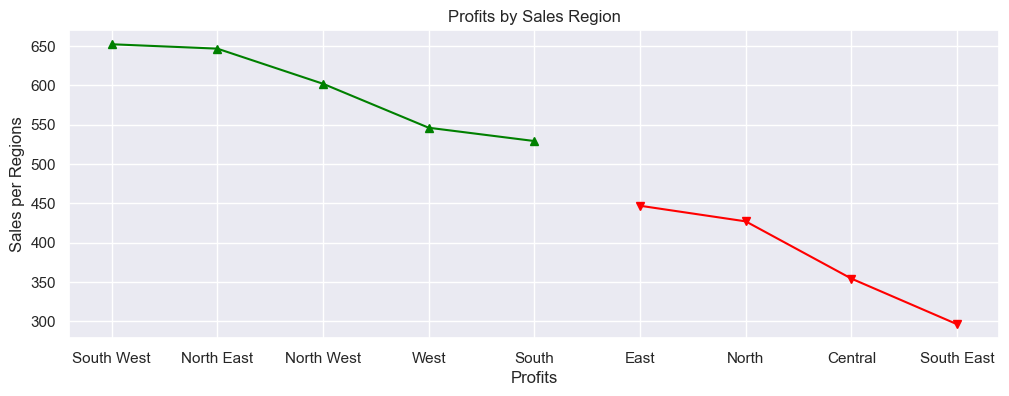

In [80]:
#This code block gives a graphical display of the regions based on their profitablity.
plt.figure(figsize=(12,4))

mask1 = col_group['profit'] >= 500
mask2 = col_group['profit'] < 500

plt.plot((col_group['region'])[mask1], (col_group['profit'])[mask1], marker = '^', color = 'green')
plt.plot((col_group['region'])[mask2], (col_group['profit'])[mask2], marker = 'v', color = 'red')

plt.title('Profits by Sales Region')
plt.xlabel('Profits')
plt.ylabel('Sales per Regions')

plt.savefig('final_files/regions_by_profit.png')

plt.show()